In [99]:
import pandas as pd
import tensorflow as tf
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error,mean_squared_error
from tensorflow.keras.models import load_model
df = pd.read_excel("bisiklet_fiyatlari.xlsx")
#sbn.pairplot(df)

# Veriyi ikiye ayırmak

In [31]:
#y = wx+b
y = df["Fiyat"].values
x = df[["BisikletOzellik1","BisikletOzellik2"]].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [32]:
x_train.shape
x_test.shape

(330, 2)

# Scaling

In [27]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [56]:
model = Sequential()
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="rmsprop",loss="mse")

In [ ]:
model.fit(x_train,y_train,epochs=250)

In [ ]:
loss = model.history.history["loss"]
sbn.lineplot(x=range(len(loss)),y = loss)

In [ ]:
trainLoss = model.evaluate(x_train,y_train,verbose=0)
testLoss = model.evaluate(x_test,y_test,verbose=0)
print(str(trainLoss)+" , "+str(testLoss))

In [68]:
testTahminler = model.predict(x_test)
testTahminler = pd.Series(testTahminler.reshape(330,))
testTahminler


0      871.992859
1      870.354614
2      871.281921
3      871.209106
4      871.205383
          ...    
325    871.784302
326    870.860535
327    870.896667
328    872.357605
329    870.861633
Length: 330, dtype: float32

In [86]:
tahminDf = pd.DataFrame(y_test,columns=["Gerçek Y"])
tahminDf = pd.concat([tahminDf,testTahminler],axis=1)
tahminDf.columns= ["Gerçek Y","Tahmin Y"]
tahminDf

,Gerçek Y,Tahmin Y
0,1081.652164,871.992859
1,622.675990,870.354614
2,889.356810,871.281921
3,902.826733,871.209106
4,897.662404,871.205383
...,...,...
325,1028.438035,871.784302
326,789.934950,870.860535
327,758.490486,870.896667
328,1172.871659,872.357605


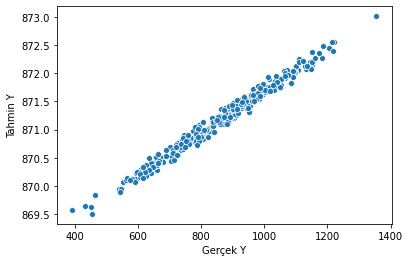

In [87]:
sbn.scatterplot(x = "Gerçek Y",y="Tahmin Y",data=tahminDf)

In [88]:
mean_absolute_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

131.07889968008996

In [89]:
mean_squared_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

26880.115443338505

In [91]:
df.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115766,1751.129414
max,1355.213745,1755.613884,1754.666038


In [96]:
yeniBisikletÖzellikleri = [[1750,1749]]

In [97]:
yeniBisikletÖzellikleri=scaler.transform(yeniBisikletÖzellikleri)

In [98]:
model.predict(yeniBisikletÖzellikleri)

array([[0.31460246]], dtype=float32)

In [100]:
model.save("bicycle.h5")

In [101]:
sonradanÇağırma = load_model("bicycle.h5")

In [102]:
sonradanÇağırma.predict(yeniBisikletÖzellikleri)

array([[0.31460246]], dtype=float32)